In [3]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library


In [12]:
df = pd.read_csv('input_ds_ready/features_rdy_smote.csv', sep=',', header=0)

In [16]:

X = df.drop(['Disease'], axis=1).values
y = list(df["Disease"])

# Adaboost

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X, y, test_size=0.15, random_state=42)


clf = AdaBoostClassifier(n_estimators=700, 
                         learning_rate=0.07,
                         random_state=0,
                         algorithm = 'SAMME',
                         base_estimator = DecisionTreeClassifier(max_depth=4))
clf.fit(X_res_train, y_res_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.07, n_estimators=700, random_state=0)

In [18]:
score_train_res = clf.score(X_res_train, y_res_train)
score_test_res = clf.score(X_res_test, y_res_test)

print(f"Train score : {score_train_res}")
print(f"Test score : {score_test_res}")

Train score : 0.87619376366356
Test score : 0.8552803129074316


# MLP

In [34]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, 
                    activation='relu', 
                    solver = 'adam', 
                    hidden_layer_sizes = (100, 200, 200, 100),
                    learning_rate_init=0.001,
                    shuffle=True,
                    early_stopping = True,
                    verbose=True,
                    max_iter=5000)

clf.fit(X_res_train, y_res_train)

Iteration 1, loss = 1.11777608
Validation score: 0.665900
Iteration 2, loss = 0.81481701
Validation score: 0.712478
Iteration 3, loss = 0.73458678
Validation score: 0.740081
Iteration 4, loss = 0.67899231
Validation score: 0.749856
Iteration 5, loss = 0.63525582
Validation score: 0.767683
Iteration 6, loss = 0.58001831
Validation score: 0.766532
Iteration 7, loss = 0.53494445
Validation score: 0.795860
Iteration 8, loss = 0.49584672
Validation score: 0.811961
Iteration 9, loss = 0.47614594
Validation score: 0.812536
Iteration 10, loss = 0.44322324
Validation score: 0.821737
Iteration 11, loss = 0.41311956
Validation score: 0.838413
Iteration 12, loss = 0.38458236
Validation score: 0.847614
Iteration 13, loss = 0.36473208
Validation score: 0.848189
Iteration 14, loss = 0.34758340
Validation score: 0.851639
Iteration 15, loss = 0.33359290
Validation score: 0.842438
Iteration 16, loss = 0.32426997
Validation score: 0.857389
Iteration 17, loss = 0.30229337
Validation score: 0.844163
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 200, 200, 100),
              max_iter=5000, random_state=1, verbose=True)

In [35]:
score_train_mlp = clf.score(X_res_train, y_res_train)
score_test_mlp = clf.score(X_res_test, y_res_test)

print(f"Train score : {score_train_mlp}")
print(f"Test score : {score_test_mlp}")

Train score : 0.9637556092509493
Test score : 0.8842894393741851


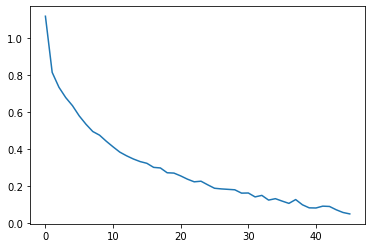

In [38]:
plt.plot(clf.loss_curve_)
plt.show()